# 1. Download dataset from Kaggle

In [74]:
!pip install -q kaggle

In [75]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [76]:
!cp kaggle.json ~/.kaggle/

In [77]:
!chmod 600 ~/.kaggle/kaggle.json

In [78]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         53           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        100           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        615           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        122           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1246           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      15212            True  
house-pr

In [79]:
!kaggle competitions download titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [80]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
df = pd.read_csv('train.csv')

In [83]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. EDA

## 2.1 Delete Name, Id, SibSp, Parch, Ticket, Cabin, Embarked

In [84]:
df = df.drop(['Name','PassengerId','SibSp','Parch','Ticket','Cabin','Embarked'], axis = 1)

In [85]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


## 2.2 Select target and input data

In [86]:
target = df.Survived

In [87]:
input = df.drop('Survived', axis = 1)

## 2.3 Separate Sex variable into Male and Female

In [88]:
dm = pd.get_dummies(input['Sex'])
dm.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


## 2.4 Concatanate dm to input data frame

In [89]:
inputs = pd.concat([input, dm], axis = 1)

In [90]:
# Delete sex column
inputs.drop('Sex', axis = 1, inplace = True)

In [91]:
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


## 2.5 Analyse Pclass column


*   No missing values



In [92]:
inputs.Pclass.isnull().sum()

0

* Making a countplot

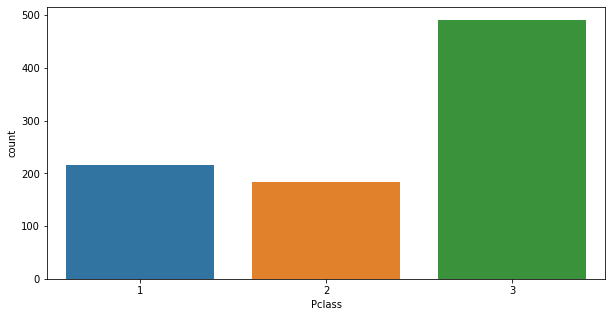

In [93]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Pclass', data = inputs)
plt.show()

## 2.6 Analyse Age column

* There are 177 missing values

In [94]:
inputs.Age.isnull().sum()

177

* Age median is 28

In [95]:
age_median = inputs.Age.median()

In [96]:
age_median

28.0

* Fill missing values with age_median

In [97]:
inputs.Age = inputs.Age.fillna(age_median)

* Age Histogram

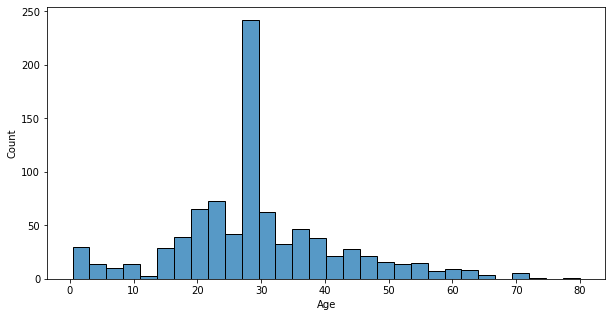

In [98]:
plt.figure(figsize = (10,5))
sns.histplot(x = 'Age', data = inputs)
plt.show()

## 2.7 Analyse Fare column

* There are no missing values

In [99]:
df.Fare.isnull().sum()

0

* Fare Histogram

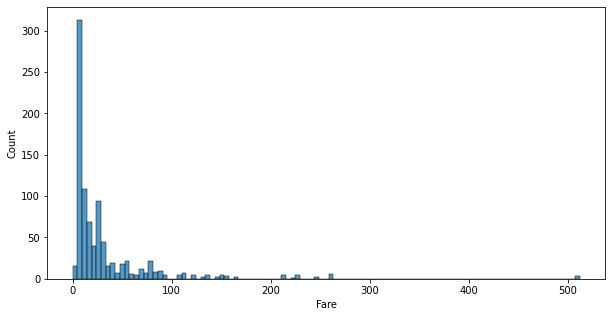

In [100]:
plt.figure(figsize = (10,5))
sns.histplot(x = 'Fare', data = inputs)
plt.show()

## 2.8 Analyse Sex columns
* No missing values

In [101]:
inputs.male.isnull().sum()

0

In [102]:
inputs.female.isnull().sum()

0

* Gender Countplot

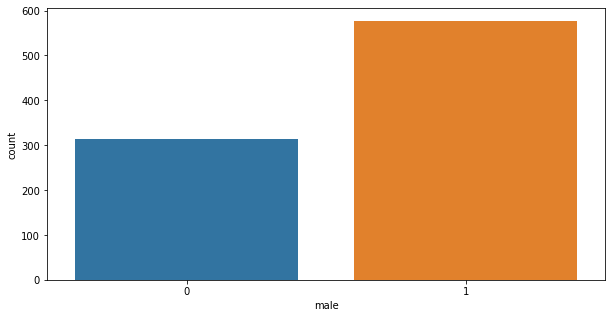

In [103]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'male', data = inputs)
plt.show()

# 3. Train-Test Split

In [104]:
import sklearn

In [105]:
from sklearn.model_selection import train_test_split

In [147]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, train_size = 0.8)

In [107]:
len(X_train)

712

In [108]:
len(X_test)

179

# 4. Naive Bayes

In [109]:
from sklearn.naive_bayes import GaussianNB

In [141]:
NB = GaussianNB()

In [150]:
NB.fit(X_train, y_train)

GaussianNB()

# 5. Predictions

* 78% - 82% acuracy using Naive Bayes

In [151]:
NB.score(X_test, y_test)

0.8212290502793296

In [148]:
NB.predict(X_test[:15])

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [115]:
y_test[:15]

567    0
322    1
520    1
459    0
571    1
696    0
25     1
548    0
146    1
809    1
93     0
418    0
723    0
717    1
270    0
Name: Survived, dtype: int64

In [117]:
NB.predict_proba(X_test[:15])

array([[0.09482573, 0.90517427],
       [0.04876882, 0.95123118],
       [0.00135424, 0.99864576],
       [0.98828133, 0.01171867],
       [0.0085666 , 0.9914334 ],
       [0.98885001, 0.01114999],
       [0.09113928, 0.90886072],
       [0.9888234 , 0.0111766 ],
       [0.98815955, 0.01184045],
       [0.00872195, 0.99127805],
       [0.98810991, 0.01189009],
       [0.97671753, 0.02328247],
       [0.97645654, 0.02354346],
       [0.04719223, 0.95280777],
       [0.91703706, 0.08296294]])

In [118]:
NB.predict_log_proba(X_test[:15])

array([[-2.35571445e+00, -9.96277951e-02],
       [-3.02066419e+00, -4.99981501e-02],
       [-6.60451844e+00, -1.35515297e-03],
       [-1.17878714e-02, -4.44657227e+00],
       [-4.75988400e+00, -8.60350734e-03],
       [-1.12126189e-02, -4.49631652e+00],
       [-2.39536635e+00, -9.55634244e-02],
       [-1.12395233e-02, -4.49393335e+00],
       [-1.19111030e-02, -4.43623392e+00],
       [-4.74191280e+00, -8.76020570e-03],
       [-1.19613377e-02, -4.43205040e+00],
       [-2.35577927e-02, -3.76005439e+00],
       [-2.38250401e-02, -3.74890702e+00],
       [-3.05352607e+00, -4.83421035e-02],
       [-8.66073897e-02, -2.48936132e+00]])

* Confusion Matrix using HeatMap

In [140]:
from sklearn.metrics import confusion_matrix

In [153]:
y_predicted = NB.predict(X_test)

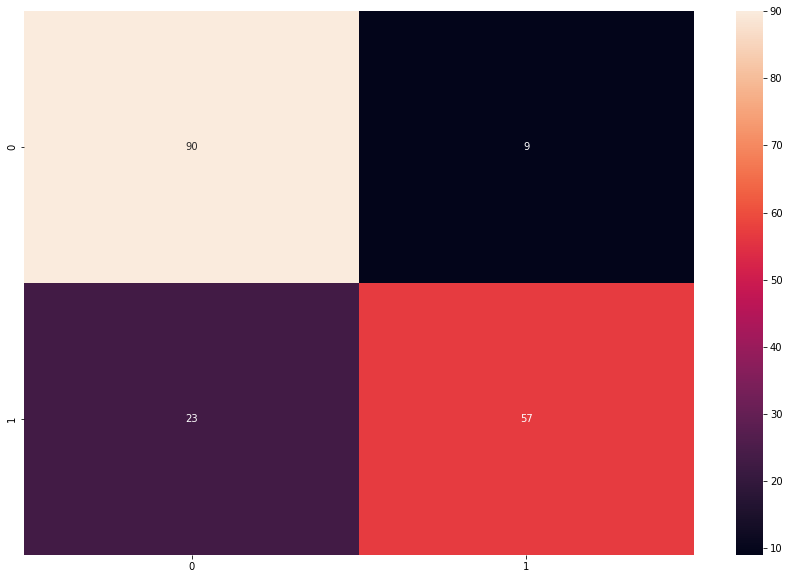

In [158]:
plt.figure(figsize = (15,10))
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot = True)
plt.show()